# Predictive Modeling Example

## Step 1: Import a number of libraries that we expect to use

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


np.random.seed(1) # set this to ensure the results are repeatable. 

# this is a notebook 'MAGIC' that will allow for creation of inline plots (this is the defaul, so often not necessary)
%matplotlib inline

## Step 2: Load the given data that we will model

In [2]:
df = pd.read_csv('c02_dataset_4_obes.csv')

df.head(10)

,X,y
0,16.24,374.36640
1,-6.12,158.13160
2,-5.28,18.39760
3,-10.73,281.04435
4,8.65,95.74875
5,-23.02,717.91060
6,17.45,383.95875
7,-7.61,191.48315
8,3.19,-8.83085
9,-2.49,-146.93485


Seperate out the input m(X) and the target (y)

In [3]:
X = df[['X']]
y = df[['y']]

## Step 3: Explore the given data

Explore the data using a scatterplot.

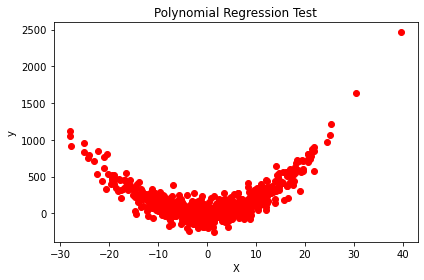

In [4]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title("Polynomial Regression Test")
plt.tight_layout()
plt.show()

## Step 4: Fit the model

Fit the linear regression model to the dataset

In [5]:
lin_reg1=LinearRegression().fit(X,y)

## Step 5: Analyze the resulting model's performance

Visualize the linear regression model results

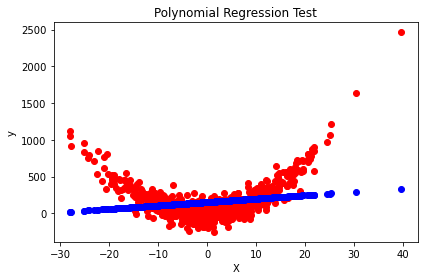

In [6]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')
ax.scatter(X,lin_reg1.predict(X),color='blue')

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title("Polynomial Regression Test")
plt.tight_layout()
plt.show()

In [7]:
b0 = lin_reg1.intercept_[0]
b1 = lin_reg1.coef_[0][0]
r2 = lin_reg1.score(X, y)

In [8]:
print(f"Y = {b0} + {b1}x")
print(f"R^2: {r2}")

Y = 152.53182724081168 + 4.670017094463779x
R^2: 0.03698337764981452


... using fstring formatting, we can display these values as follows...

In [9]:
print(f"Y = {b0:.2f} + {b1:.2f}x")
print(f"R^2: {r2:.3f}") 
# for more on fstrings see here https://www.freecodecamp.org/news/python-f-strings-tutorial-how-to-use-f-strings-for-string-formatting/

Y = 152.53 + 4.67x
R^2: 0.037


## Step 6: Try another model (in this case, a second order polynomial)

Create the features (that is, x and x^2) for the linear regression. Then do all the analysis we did above again.

In [10]:
X_poly=PolynomialFeatures(degree=2).fit_transform(X)

Fit this model to the polynomial features...

In [11]:
lin_reg2=LinearRegression().fit(X_poly,y)

Explore the results visually...

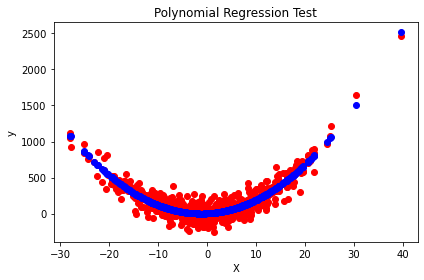

In [12]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')
ax.scatter(X,lin_reg2.predict(X_poly),color='blue')

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title("Polynomial Regression Test")
plt.tight_layout()
plt.show()

Look at what the 'hidden model' is that we have identified...

In [13]:
print(f"Y = {lin_reg2.intercept_[0]:.2f} + {lin_reg2.coef_[0][1]:.2f}x + {lin_reg2.coef_[0][2]:.2f}x^2")
print(f"R^2: {lin_reg2.score(X_poly, y):.2f}")

Y = 3.75 + 3.65x + 1.51x^2
R^2: 0.84


The values of the r2 for the best fit model has increased from 0.83 to 0.84 after decreasing the number of obesravtions.we have changed the number of observation from 1000 to 700.